In [10]:
# import dependencies/libraries
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb

In [11]:
# Import dataset and view first 5 rows
df = pd.read_csv('/Users/clarawei/school/Stock-Predictor/Stock-Predictor/amazon.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/08/2025,$222.13,25033290,$223.185,$223.52,$220.20
1,01/07/2025,$222.11,28084160,$227.90,$228.381,$221.46
2,01/06/2025,$227.61,31849830,$226.78,$228.835,$224.84
3,01/03/2025,$224.19,27515610,$222.505,$225.36,$221.62
4,01/02/2025,$220.22,33956580,$222.03,$225.15,$218.19


Columns:

Close/Last: The price the stock ends at on the trading day, often looked at as the performance indicator for a stock.

Open: The price the stock starts at when the market opens.

High: The highest price the stock reached during the trading day.

Low: The lowest price the stock reached during the trading day.

Volume: The total number of shares traded during the day.

In [44]:
# Get info
df.shape
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Here, we can see we have 2516 rows and no null values. 
It can be valuable to see the data types of each column, as well as whether we have missing data. Since we don't, we luckily don't have to modify the data. 

In [18]:
# Reverse the rows so the dates are in order
df_reversed = df.iloc[::-1]

# Reset index to maintain the correct sequential order 
df_reversed.reset_index(drop=True, inplace=True)

# View the reversed df to ensure the order is correct
df_reversed.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/09/2015,$14.8465,51798280,$15.074,$15.1435,$14.834
1,01/12/2015,$14.5705,68128760,$14.878,$14.9255,$14.4641
2,01/13/2015,$14.737,82706720,$14.874,$15.0749,$14.6615
3,01/14/2015,$14.6635,109868040,$14.5965,$14.7955,$14.3252
4,01/15/2015,$14.3475,88212580,$14.70,$14.80,$14.3408


Plotting Close Prices

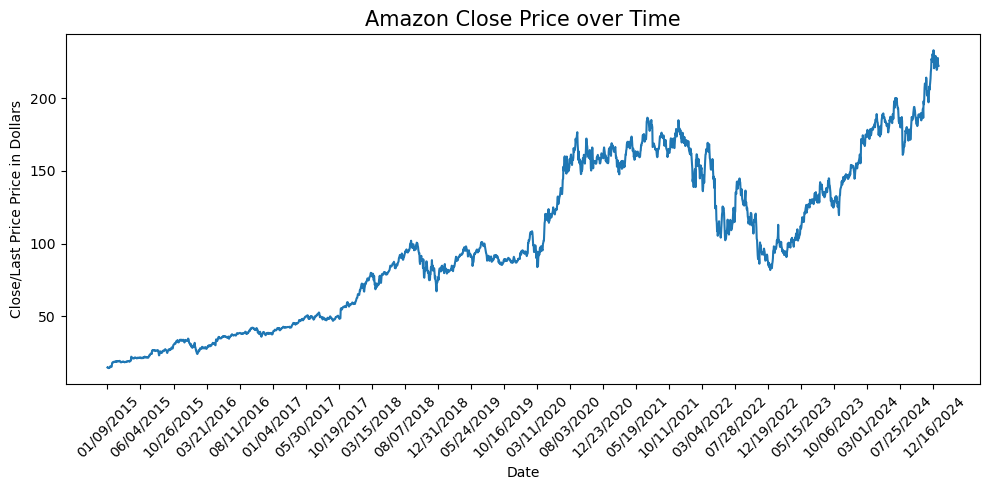

In [23]:
# Convert 'Close/Last' to a string
df_reversed['Close/Last'] = df_reversed['Close/Last'].astype(str)

# Strip dollar signs and convert to numeric
df_reversed['Close/Last'] = df_reversed['Close/Last'].str.replace('$', '', regex=False).astype(float)

# Plot close prices
plt.figure(figsize=(10,5))
plt.plot(df_reversed['Date'], df_reversed['Close/Last'])
plt.title('Amazon Close Price over Time', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Close/Last Price Price in Dollars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(ticks=range(0, len(df_reversed['Date']), 100), rotation=45)
plt.show()

Analysis: The Amazon close price appears to be generally increasing over time, with a large spike around 2020 from $100 to $190. This could be due to the apps popularity and increase in demand for deliveries as the pandemic caused more to buy items online. There was a dip in 2022 to $100. However, overall the stock has generally increased in value over time and reflects positive market sentiment. The large fluctuations could reveal high volatility, which is associated with higher investment risk, or these could align with large events within Amazon or the stock market itself. Generally, stocks do tend to fluctuate during certain seasons, such as near holidays and the end of the fiscal year. Investors can use these plots showcasing the overall trend for making decisions about whether they would like to sell, buy, or hold the stock. 

Plotting volume over time

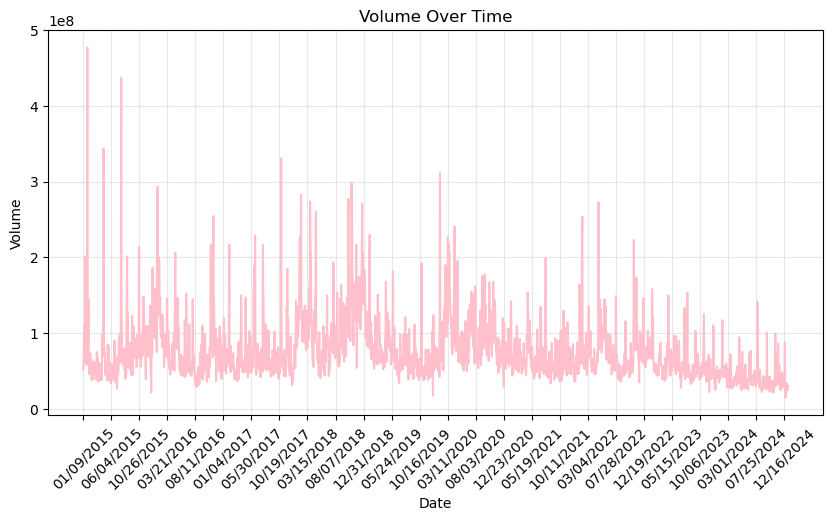

In [27]:
# Plot Volume over time
plt.figure(figsize=(10, 5))
plt.plot(df_reversed['Date'], df_reversed['Volume'], label='Volume', color='pink')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(alpha=0.3)
plt.xticks(ticks=range(0, len(df_reversed['Date']), 100), rotation=45)
plt.show()

High-Low Spread: Difference between daily high and low prices (volatility)

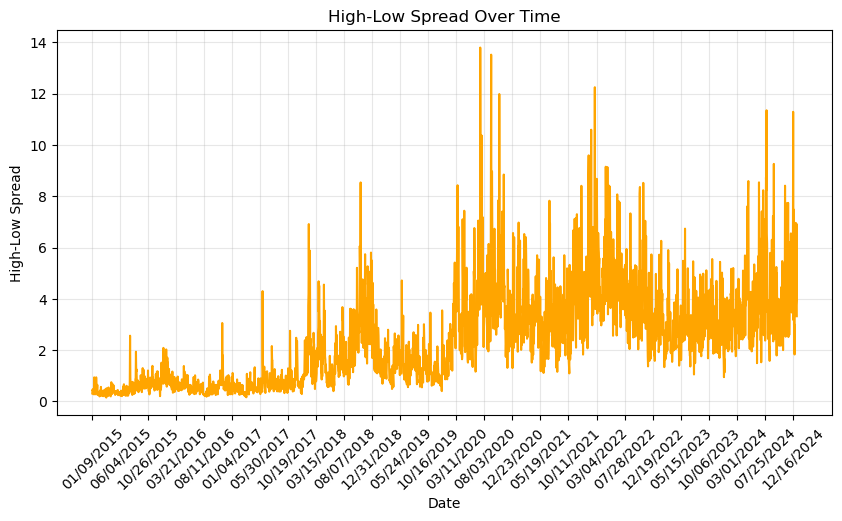

In [37]:
# Convert 'High' and 'Low' to strings, remove the dollar sign, and then convert to float
df_reversed['High'] = df_reversed['High'].astype(str).str.replace('$', '').astype(float)
df_reversed['Low'] = df_reversed['Low'].astype(str).str.replace('$', '').astype(float)

# Calculate High-Low spread
df_reversed['High/Low Spread'] = df_reversed['High'] - df_reversed['Low']

# Plot High-Low spread over time
plt.figure(figsize=(10, 5))
plt.plot(df_reversed['Date'], df_reversed['High/Low Spread'], label='High-Low Spread', color='orange')
plt.xlabel('Date')
plt.ylabel('High-Low Spread')
plt.title('High-Low Spread Over Time')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.xticks(ticks=range(0, len(df_reversed['Date']), 100), rotation=45)
plt.show()

The difference in high and low close prices for each day do not appear to vary much until 2020. The maximum difference is approximately $12. Towards more recent data, at the end of 2024, the volatility levels out to approximately $9. 

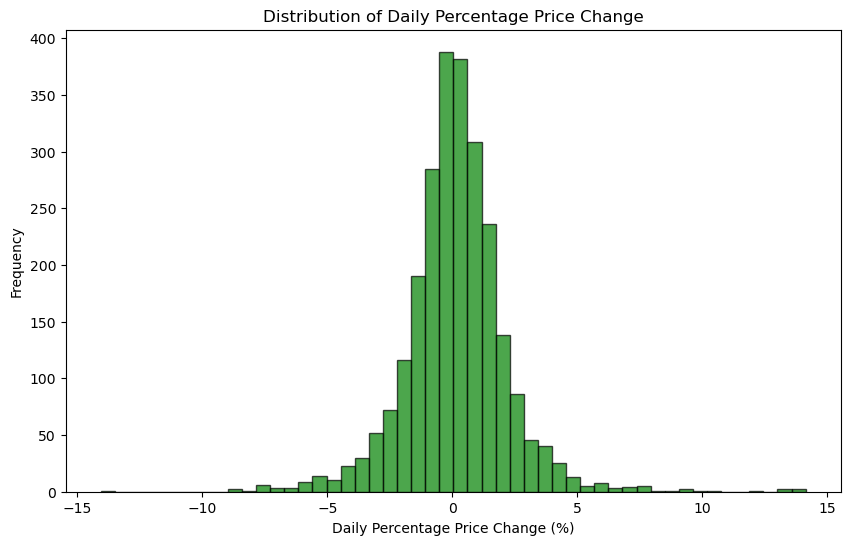

In [41]:
# Calculate the daily percentage change in 'Close/Last' price
df_reversed['Pct Change'] = df_reversed['Close/Last'].pct_change() * 100  # Percentage change in %

# Plot histogram of daily percentage price change
plt.figure(figsize=(10, 6))
plt.hist(df_reversed['Pct Change'].dropna(), bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Daily Percentage Price Change')
plt.xlabel('Daily Percentage Price Change (%)')
plt.ylabel('Frequency')
plt.show()

The daily price follows a bell curve or normal distribution, which is typical. This indicates that over each day, the behavior of the stock is relatively random.

In [ ]:
#TO DO: More EDA if necessary

# Data normalization

# Split into training and test sets

# Create your assigned model

# Test your assigned model